<a href="https://colab.research.google.com/github/mfleks/analizagrupaj/blob/main/PythonProjekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Wgranie niezbędnych funkcji oraz pakietów:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from sklearn import metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBClassifier
from xgboost import XGBRegressor
import xgboost as xgb

Wykorzystany zbiór danych pochodzi ze strony Kaggle i dotyczy filmów znajdujących się w bazie danych IMDB, jednej z największych i najbardziej znanych baz danych dotyczących filmów na świecie. Zdecydowałem się na ten zestaw, ponieważ jest bardzo bogaty w różnorodne informacje, które są istotne z punktu widzenia analizy filmów. Zawiera zarówno zmienne liczbowe, które mogą być wykorzystane do budowy modeli predykcyjnych (np. liczba głosów czy popularność), jak i zmienne kategoryczne oraz tekstowe, które dostarczają dodatkowego kontekstu (np. język filmu, opis czy tytuł). Dodatkowo dane pochodzą z IMDB, co daje pewność co do ich jakości i wiarygodności. Jest to idealny zbiór, który pozwala nie tylko eksplorować różne aspekty kinematografii, ale także zrozumieć mechanizmy wpływające na popularność i ocenę filmów.

Zbiór danych zawiera szereg zmiennych, które opisują cechy poszczególnych filmów. Część z nich nie zostanie wykorzystana bezpośrednio w modelu, ale może służyć do analizy kontekstowej. Są to m.in.:

*   id – wartość przypisana każdemu z filmów w bazie danych,
*   original_language – język, w którym został nakręcony film,
*   original_title – oryginalny tytuł filmu,
*   overview – krótki opis filmu,
*   title – anglojęzyczny tytuł filmu.

Do opracowania modelu wybrano natomiast następujące zmienne:


*   vote_average – średnia ocena filmu na IMDB w skali od 1 do 10 (zmienna objaśniana, czyli nasz cel predykcji),
*   vote_count – liczba głosów oddanych na dany film
*   popularity – wartość liczbową mierzącą popularność filmu, wykorzystywaną przez IMDB,
*   release_date – data premiery filmu, z której przekształcono zmienną określającą rok premiery filmu (year).


Przekształcenie zmiennej release_date na year pozwala na analizowanie trendów w czasie i jest kluczowe dla zrozumienia, jak oceny filmów zmieniały się w zależności od roku premiery.


W celu przygotowania danych do analizy, na początku usunięto brakujące obserwacje, aby zapewnić kompletność i jakość zestawu danych. Następnie utworzono nową kolumnę, która zawiera jedynie rok premiery filmu. Kolejnym krokiem było usunięcie kolumn, które nie będą wykorzystywane w modelu, takich jak id, original_language, original_title, overview, release_date oraz title. Dzięki temu zestaw danych zawiera jedynie zmienne istotne do dalszej analizy i modelowania: popularity, vote_average, vote_count oraz year.

In [ ]:
os.chdir("/")
df=pd.read_csv("movies.csv")
df=df.dropna()
df["year"]=pd.DatetimeIndex(df["release_date"]).year
df=df.drop(["id", "original_language", "original_title", "overview", "release_date", "title"], axis=1)
df

,popularity,vote_average,vote_count,year
0,170.540,8.7,290,2022
1,86.518,8.7,16988,1972
2,84.681,8.7,22748,1994
3,44.957,8.6,10293,1974
4,32.859,8.6,299,2021
...,...,...,...,...
9995,9.532,5.3,529,2003
9996,5.835,5.3,304,2014
9997,51.415,5.3,839,2011
9998,6.226,5.3,242,2011


W celu zapewnienia powtarzalności wyników ustawiono wartość seed na stałą (1). Następnie dane zostały podzielone na zmienne objaśniające (X) oraz zmienną objaśnianą (y), gdzie X zawiera wszystkie kolumny poza vote_average, a y reprezentuje właśnie tę zmienną. Dane zostały podzielone na zestaw treningowy i testowy, przy czym 20% danych przeznaczono do testowania modelu.

In [ ]:
SEED=1
X=df.drop(["vote_average"], axis=1)
y=df["vote_average"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Do predykcji wykorzystano regresor RandomForest z liczbą estymatorów ustawioną na 400. Model został dopasowany do danych treningowych, a następnie użyty do przewidywania wyników dla zestawu testowego. Obliczono także kluczowe metryki oceny modelu, takie jak MSE (średni błąd kwadratowy), RMSE (pierwiastek z MSE) oraz MRE (średni błąd względny). Wyniki pokazują, że model osiągnął zadowalającą dokładność, co potwierdzają niskie wartości błędów.

In [ ]:
rf=RandomForestRegressor(n_estimators=400, random_state=SEED)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
mse=MSE(y_test, y_pred)
rmse_test=mse**(1/2)
mre=abs((y_pred-y_test)/y_test)
print("MSE:",mse)
print("RMSE:",rmse_test)
print("MRE:",mre.mean())

MSE: 0.4574991091483247
RMSE: 0.6763868043866059
MRE: 0.08238779183378374


Aby zrozumieć znaczenie poszczególnych zmiennych w procesie predykcji, przeanalizowano ich istotność na podstawie modelu RandomForest. Wyniki zostały zaprezentowane na wykresie słupkowym, który pokazuje, w jakim stopniu każda zmienna wpływa na wynik predykcji. Jak widać, największe znaczenie w modelu miała zmienna vote_count, zaraz po niej popularity, a najmniejszy wpływ miała zmienna year.

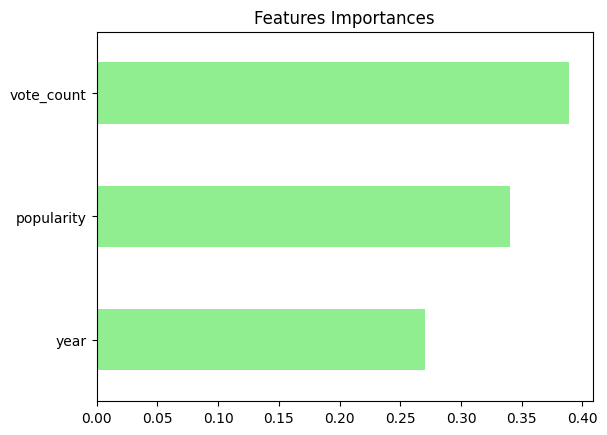

In [ ]:
importances = pd.Series(data=rf.feature_importances_, index= X_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

Wykonanie podstawowego Gradient Boostingu.




In [ ]:
gb = GradientBoostingRegressor(max_depth=4,  n_estimators=400, random_state=42)
gb.fit(X_train, y_train)
y_predgb = gb.predict(X_test)
mse_testgb = MSE(y_test, y_predgb)
rmse_testgb = mse_testgb**(1/2)
mregb=abs((y_predgb-y_test)/y_test)
print("MSE:",mse_testgb)
print("RMSE:",rmse_testgb)
print("MRE:",mregb.mean())

MSE: 0.41878519401162156
RMSE: 0.6471361479716781
MRE: 0.07813980951948994


Dokonanie predykcji oraz pomiarów metodą rozszerzonego gradient boostingu (pakiet xgboost).

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dtrain=xgb.DMatrix(X_train, label=y_train)
dtest=xgb.DMatrix(X_test, label=y_test)

params={"objective":"reg:squarederror", "max_depth":2}

bst=xgb.train(params=params, dtrain=dtrain, num_boost_round=100)

y_predxg=bst.predict(dtest)

mse_testxg = MSE(y_test, y_predxg)
rmse_testxg = mse_testxg**(1/2)
mrexg=abs((y_predxg-y_test)/y_test)

print("MSE:",mse_testxg)
print("RMSE:",rmse_testxg)
print("MRE:",mrexg.mean())

MSE: 0.40821638767569135
RMSE: 0.6389181384776076
MRE: 0.07763843705284384


Wykres ważności parametrów dla metody rozszerzonego boostingu gradientowego.

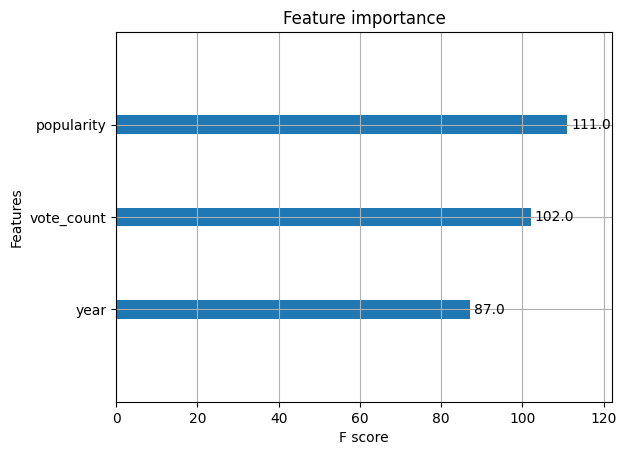

In [ ]:
xgb.plot_importance(bst)
plt.show()

Średnia wartość zmiennej objaśnianej vote_average:

In [ ]:
va=df["vote_average"].mean()
print(va)

6.682059235541325


Wynik wynosi około 6.68, co oznacza, że przeciętna ocena filmów w zbiorze danych oscyluje w okolicach 6.7 w skali od 1 do 10.

Podsumowanie

Porównanie wartości MSE, MRSE oraz MAE dla zastosowanych metod przy tym samym współczynniku podziału danych na treningowe oraz testowe, a także dla tej samej wartości random_state:

Metoda Random Forest:

MSE: 0.4574991091483247

RMSE: 0.6763868043866059

MRE: 0.08238779183378374

Podstawowy Gradient Boosting:

MSE: 0.41878519401162156

RMSE: 0.6471361479716781

MRE: 0.07813980951948994

Rozszerzony Gradient Boosting:

MSE: 0.40821638767569135

RMSE: 0.6389181384776076

MRE: 0.07763843705284384

Interpretacja wyników błędów:

Mean Squared Error (MSE) – Średni błąd kwadratowy: Rozszerzony Gradient Boosting osiągnął najniższą wartość (0.4082), co oznacza, że najlepiej dopasował się do danych w porównaniu do pozostałych modeli. Random Forest charakteryzuje się najwyższym MSE (0.4575), co wskazuje na mniejszą precyzję w przewidywaniu w stosunku do Gradient Boostingu i Rozszerzonego Gradient Boostingu.

Root Mean Squared Error (RMSE) – Pierwiastek z MSE:
RMSE jest interpretowany jako średnie odchylenie przewidywań od rzeczywistych wartości. Rozszerzony Gradient Boosting osiągnął najlepszy wynik (0.6389), co oznacza, że przeciętne odchylenie od prawdziwej oceny filmu jest najniższe w tym przypadku. Random Forest odnotował najwyższą wartość RMSE (0.6764), co wskazuje na większy margines błędu.

Mean Relative Error (MRE) – Średni względny błąd:
Rozszerzony Gradient Boosting (0.0776) i Gradient Boosting (0.0781) uzyskały bardzo podobne wyniki, co oznacza, że obie metody mają bardzo niskie względne błędy w stosunku do średniej wartości zmiennej objaśnianej. Random Forest (0.0824) osiągnął wyższy wynik, co oznacza większy względny błąd w porównaniu z pozostałymi modelami.

Błędy te dotyczą szacowanej wartości zmiennej objaśnianej vote_average, której średnia wartość wynosi około 6.68. Otrzymane błędy można zatem interpretować jako bardzo niskie w stosunku do tej średniej: Dla Rozszerzonego Gradient Boostingu, przeciętne odchylenie RMSE (0.6389) stanowi mniej niż 10% średniej wartości. Podobnie dla Gradient Boosting (RMSE 0.6471) i Random Forest (RMSE 0.6764), błędy również utrzymują się w zakresie poniżej 10% średniej oceny, co wskazuje na bardzo dobrą jakość predykcji dla wszystkich metod.